In [1]:
import pandas as pd
import seaborn as sns
from contextlib import redirect_stdout

In [2]:
be_points = pd.read_pickle("be_points.pkl")
be_points = be_points.assign(
    family=be_points.protocol,
    protocol=lambda d: d.protocol + "-" + d.k.map(str) + "-" + d.reward,
)
be_points.drop(columns=["path", "break_even_png"])

,protocol,k,reward,subblock_selection,gamma,kind,alpha,policy,reused,break_even,family
0,bk-8-constant,8,constant,n/a,0.05,hard-coded,0.35,avoid-loss,False,0.304571,bk
1,bk-8-constant,8,constant,n/a,0.05,trained,0.30,ppo-7fjmew8i-best,False,0.251185,bk
2,bk-8-constant,8,constant,n/a,0.50,hard-coded,0.35,avoid-loss,False,0.306318,bk
3,bk-8-constant,8,constant,n/a,0.50,trained,0.30,ppo-7c1oa4ew_2,False,0.267602,bk
4,bk-8-constant,8,constant,n/a,0.95,hard-coded,0.35,avoid-loss,False,0.303266,bk
5,bk-8-constant,8,constant,n/a,0.95,trained,0.30,ppo-nkt6619p-best,False,0.202053,bk
6,nakamoto-1-constant,1,constant,n/a,0.05,hard-coded,0.35,eyal-sirer-2014,False,0.329727,nakamoto
7,nakamoto-1-constant,1,constant,n/a,0.05,trained,0.35,ppo-0f15moox-best,False,0.328231,nakamoto
8,nakamoto-1-constant,1,constant,n/a,0.50,hard-coded,0.25,sapirshtein-2016-sm1,False,0.251748,nakamoto
9,nakamoto-1-constant,1,constant,n/a,0.50,trained,0.30,ppo-r6stc42z-best,False,0.273448,nakamoto


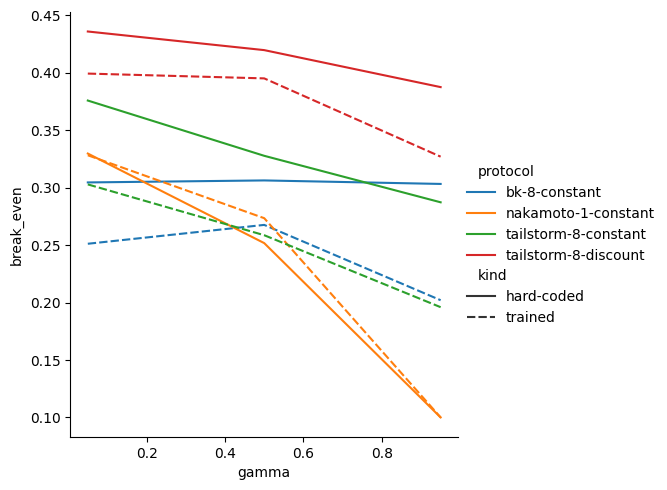

In [3]:
sns.relplot(
    data=be_points,
    kind="line",
    hue="protocol",
    x="gamma",
    y="break_even",
    style="kind",
)

In [4]:
be_points.pivot(index=["protocol"], columns=["kind", "gamma"], values=["break_even"])

break_even                                            \
kind                 hard-coded   trained hard-coded   trained hard-coded   
gamma                      0.05      0.05       0.50      0.50       0.95   
protocol                                                                    
bk-8-constant          0.304571  0.251185   0.306318  0.267602   0.303266   
nakamoto-1-constant    0.329727  0.328231   0.251748  0.273448   0.100000   
tailstorm-8-constant   0.375858  0.302859   0.327751  0.258628   0.287276   
tailstorm-8-discount   0.435967  0.399330   0.419758  0.395151   0.387555   

                                
kind                   trained  
gamma                     0.95  
protocol                        
bk-8-constant         0.202053  
nakamoto-1-constant   0.100000  
tailstorm-8-constant  0.195971  
tailstorm-8-discount  0.327004

In [5]:
gamma = sorted(be_points.gamma.drop_duplicates())
d = be_points.set_index(["protocol", "gamma", "kind"]).break_even
p = {
    "Bitcoin": "nakamoto-1-constant",
    "Constant": "tailstorm-8-constant",
    "Tailstorm": "tailstorm-8-discount",
    "$\\mathcal B_k$": "bk-8-constant",
}


def table0():
    # Header
    print("\\bgroup")
    print("\\newcolumntype{Y}{>{\\centering\\arraybackslash}X}")
    print("\\begin{tabularx}{\\linewidth}{lYYYYYY}")
    print("\\toprule")
    print(
        " & \\multicolumn{3}{c}{Trained Policy} & \\multicolumn{3}{c}{Reference Policy} \\\\"
    )
    print("\\cmidrule(lr){2-4}\\cmidrule(l){5-7}")
    print("$\\gamma$", end="")
    for i in range(2):
        for g in gamma:
            print(f" & {g*100:.0f}\\,\\%", end="")
    print(" \\\\")
    print("\\midrule")
    # Content
    for label, proto in p.items():
        print(f"{label}", end="")
        for k in ["trained", "hard-coded"]:
            for g in gamma:
                a = d.loc[(proto, g, k)] * 100
                if a == 10:
                    print("& {$\leq 10$}", end="")
                else:
                    print(f" & {a:.1f}", end="")
        print(" \\\\")
    print("\\bottomrule")
    print("\\end{tabularx}")
    print("\\egroup")


table0()
with open("break-even.tex", "w") as f:
    with redirect_stdout(f):
        table0()

\bgroup
\newcolumntype{Y}{>{\centering\arraybackslash}X}
\begin{tabularx}{\linewidth}{lYYYYYY}
\toprule
 & \multicolumn{3}{c}{Trained Policy} & \multicolumn{3}{c}{Reference Policy} \\
\cmidrule(lr){2-4}\cmidrule(l){5-7}
$\gamma$ & 5\,\% & 50\,\% & 95\,\% & 5\,\% & 50\,\% & 95\,\% \\
\midrule
Bitcoin & 32.8 & 27.3& {$\leq 10$} & 33.0 & 25.2& {$\leq 10$} \\
Constant & 30.3 & 25.9 & 19.6 & 37.6 & 32.8 & 28.7 \\
Tailstorm & 39.9 & 39.5 & 32.7 & 43.6 & 42.0 & 38.8 \\
$\mathcal B_k$ & 25.1 & 26.8 & 20.2 & 30.5 & 30.6 & 30.3 \\
\bottomrule
\end{tabularx}
\egroup
